## Filtering for Hardy-Weinberg equilibrium


<br>

This notebook filters loci that are out of Hardy-Weinberg equilibrium for **BATCH 2**

#### 6/12/2017

### 1. Convert final file to genepop



In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks'

In [2]:
cd ../scripts/PostStacksFiltering/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/scripts/PostStacksFiltering


In [3]:
!head genepop_conversion_forR_6-12.py

In [5]:
!python genepop_conversion_forR_6-12.py \
../../stacks_b2_wgenome/batch_2.filteredMAF_filteredLoci_filteredIndivids.csv \
../../stacks_b2_wgenome/batch_2.filteredMAF_filteredLoci_filteredIndivids.gen


I then changed the file name to `batch_2_filteredMAF_filteredLoci_filteredIndivids.txt` for genepop, which requires a text file and cannot have a second "`.`" in the file name. 





### 2. Ran GENEPOP 

On the genepop file `batch_2_filteredMAF_filteredLoci_filteredIndivids.txt`

Use the options: 
`1... Hardy-Weinberg exact tests >> 3...test for each locus in each population, Probability test`



<br>


### 3. Parse GENEPOP output

Genepop put out a file `batch_2...txt.P` that contains, at the bottom, a list of by-locus p-values and Fis estimates by population. 

I created the following script to parse out this information into TWO tab-delimited files that are organized as 2x2 charts: locus in the first column, and population in the first row. The first file gives calculated HWE p-values, and the second file contains the W&C Fis estimates.  

In [7]:
cd ../../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [11]:
!head genepop/parse_genepop_HWEbylocus.py

#### This script will take the output file from genepop's HWE by locus exact test (option 1 >>> 3) and create two files with 2x2 arrays to parse out the HWE p-value and the HWE Fis value per locus per population      ####

import argparse

parser = argparse.ArgumentParser()
parser.add_argument("-p", "--P", help="path & name of .P file output from genepop")
parser.add_argument("-op", "--OUTPUTpval", help="path & name of the output file for the parsed HWE pvalues")
parser.add_argument("-of", "--OUTPUTfis", help="path & name of the output file for the parsed Fis values")
args = parser.parse_args()



In [12]:
!python genepop/parse_genepop_HWEbylocus.py \
-p ../stacks_b2_wgenome/batch_2_filteredMAF_filteredLoci_filteredIndivids.txt.P \
-op batch_2_HWEpvals.txt \
-of batch_2_Fis.txt

generating dictionaries of pvalues and fis values...
writing output to files...
done.


My HWE p-value script also created a 9th column titled "Percent.Sig", which calculates how many of the eight populations has a p value BELOW 0.05. Percents are calculated using all eight populations even if some of the populations had "NA". 


<br>

### 3. Graph distribution of loci out of HWE 


<br>
For each locus, I calculated the percentage of populations in which that locus was out of HWE. I then plotted a histogram. 

In [4]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/analyses'

In [5]:
cd ../PCod-US-repo/analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses


In [6]:
!head batch_2_HWEpvals.txt

# parsed GENEPOP output, HWE p-values by locus by population. #
locus	KOD03	AD06	WC05	HS04	PS12	GS13	PWS12	UP03	Percent.Sig
16078	0.3125	0.2635	0.0060	0.2289	0.4877	0.4991	0.1753	0.0855	0.125
16073	1.0000	1.0000	0.2308	0.2990	0.0863	1.0000	1.0000	0.3231	0.0
16075	0.1741	1.0000	NA	1.0000	0.3212	NA	1.0000	1.0000	0.0
9389	0.0347	0.1169	0.2673	0.3119	0.0553	0.1000	0.2889	0.6972	0.125
13732	1.0000	1.0000	0.0795	1.0000	1.0000	NA	NA	1.0000	0.0
11545	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000	1.0000	0.0
11549	1.0000	1.0000	1.0000	1.0000	0.5699	1.0000	NA	NA	0.0
5989	1.0000	1.0000	1.0000	1.0000	0.3137	1.0000	1.0000	1.0000	0.0


In [7]:
infile = open("batch_2_HWEpvals.txt", "r")

percents = []
loci_list = []

for line in infile:
    if "locus" not in line:
        new_percent = float(line.strip().split()[9])
        percents.append(new_percent)
        loci_list.append(line.strip().split()[0])

infile.close()

In [8]:
import numpy as np
import matplotlib.pyplot as plt

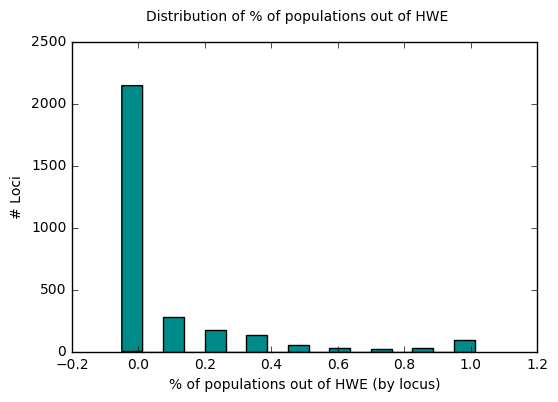

In [9]:
plt.hist(percents, bins = np.arange(-0.1, 1, .0625)+0.05, color = "darkcyan")
plt.suptitle("Distribution of % of populations out of HWE")
plt.xlabel("% of populations out of HWE (by locus)")
plt.ylabel("# Loci")
plt.show()

In [10]:
plt.close()



#### 6/13/2017


<br>
Based on the distribution above, I'm going to create a list of the loci that are out of Hardy-Weinberg Equilibrium in more than 6 of the populations (0.75).---- also did this in batch 1

Since the loci were added to `loci_list` in the same order as the percents were added to `percents`, I can do this by extracting a list of indices from percents and then using those to refer to certain loci. 

In [11]:
#extract indices of loci with >6 pops out of HWE
indices = []
count = 0 

for i in range(0, len(percents)):
    if percents[i] >= 0.75:
        indices.append(i)

In [12]:
print len(indices)

139


In [13]:
# create a new list of loci to remove and write to file for later. 
outfile = open("Loci_outof_HWE_6of8pops_BATCH2.txt", "w")
outfile.write("# These loci have more than 6 populations out of HWE. 6-13-2017.\n")

for index in indices:
    newlocus = loci_list[index]
    outfile.write(newlocus + "\n")
outfile.close()



<br>
### 4. Use multiple testing technique to generate chi-square value for each locus


The `Biometrics` book proposes a method to coerce multiple tests into a chi-square distribution that then allows you to test for significance. 

At each locus: **(1)** Sum the natural logs of the p-values, **(2)** Add these together, **(3)** multiple by `-2` to generate a chi-square value, and **(4)** complete a chi-square test with [n_pops x 2] degrees of freedom.

In [32]:
from scipy.stats import chisqprob

In [33]:
import numpy as np

In [34]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/analyses'

In [35]:
## STEP ONE: conduct chisquare and determine loci out of HWE. 
## write results to a file and save a list of the loci out of HWE. 

infile = open("batch_2_HWEpvals.txt", "r")
outfile = open("batch_2_HWEchisquare.txt", "w")

outfile.write("locus\tChiSquare\tdf\tpvalue\n")

sig_count = 0
loci_to_discard = []

for line in infile:
    if "locus" not in line:
        linelist= line.strip().split()
        outfile.write(linelist[0]) #write locus name to outfile
        sum = 0 #sum of ln(pvals)
        n_pops = 0 # number of pops with pvals (some will have NAs)
        for i in range(1,8):
            if linelist[i] != "NA" and float(linelist[i]) == 0.0:
                newval = np.log(float(0.00000000001))
                sum += newval
                n_pops += 1
            elif linelist[i] != "NA" and float(linelist[i]) != 0.0:
                newval = np.log(float(linelist[i]))
                sum += newval
                n_pops += 1
        chisquare = float(-2) * float(sum)
        df = n_pops * 2
        outfile.write("\t" + str(chisquare) + "\t" + str(df))
        pvalue = chisqprob(chisquare,df)
        if pvalue < 0.05:
            sig_count += 1
            loci_to_discard.append(linelist[0])
        outfile.write("\t" + str(pvalue) + "\n")
infile.close()
outfile.close()

print "You have ", sig_count, " loci out of HWE."

        
                
            
        

You have  535  loci out of HWE.


In [46]:
## STEP TWO: rewrite the file of HWEpvals by locus by population, 
## excluding those loci out of HWE. 

infile = open("batch_2_HWEpvals.txt", "r")
outfile = open("batch_2_HWEpvals_filtered.txt", "w")

locus_count = 0

for line in infile:
    if line.startswith("#"):
        outfile.write("# parsed GENEPOP output, HWE p-values by locus by population FILTERED #\n")
    elif line.startswith("locus"):
        outfile.write(line)
    else:
        locus = line.strip().split()[0]
        if locus not in loci_to_discard:
            outfile.write(line)
            locus_count += 1
infile.close()
outfile.close()
print locus_count, " loci written to output file."

2410  loci written to output file.



<br>
### 5. Plot new distribution

In [47]:
infile = open("batch_2_HWEpvals_filtered.txt", "r")

percents = []
loci_list = []

for line in infile:
    if "locus" not in line and "#" not in line:
        new_percent = float(line.strip().split()[9])
        percents.append(new_percent)
        loci_list.append(line.strip().split()[0])

infile.close()

In [48]:
import numpy as np
import matplotlib.pyplot as plt

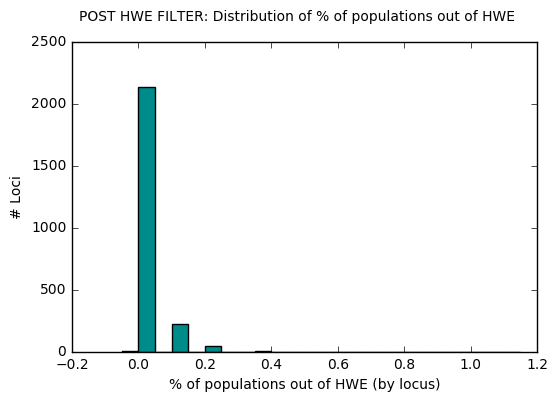

In [49]:
plt.hist(percents, bins = np.arange(-0.1, 1.1, .05)+0.05, color = "darkcyan")
plt.suptitle("POST HWE FILTER: Distribution of % of populations out of HWE")
plt.xlabel("% of populations out of HWE (by locus)")
plt.ylabel("# Loci")
plt.show()

In [50]:
plt.close()


<br>

Now I just have to delete the loci that are listed in `batch_2_HWEpvals_filtered.txt` from my final filtered genepop. 

In [51]:
oldcsv = open("../stacks_b2_wgenome/batch_2.filteredMAF_filteredLoci_filteredIndivids.csv", "r")
locifile = open("batch_2_HWEpvals_filtered.txt", "r")
newcsv = open("../stacks_b2_wgenome/batch_2.filteredMAF_filteredLoci_filteredIndivids_filteredHWE.csv", "w")
blacklistedcsv = open("../stacks_b2_wgenome/batch_2.filteredMAF_filteredLoci_filteredIndivids_HWE_BAD.csv", "w")

newcsv.write(oldcsv.readline())

loci_to_keep = []

for line in locifile: 
    if "locus" not in line:
        loci_to_keep.append(line.strip().split("\t")[0]) 
locifile.close()

print "Preparing to copy ", len(loci_to_keep), " loci from old csv file"
print ""

newcsv.write(oldcsv.readline())

cp_count = 0
rm_count = 0
loci_kept = []

for line in oldcsv: 
    locusID = line.strip().split(",")[0]
    if locusID in loci_to_keep:
        newcsv.write(line)
        cp_count += 1
        loci_kept.append(locusID)
    else:
        blacklistedcsv.write(line)
        rm_count += 1
oldcsv.close()
newcsv.close()

print "Wrote ", cp_count, " loci to new csv file."
print "Removed ", rm_count, " loci."


Preparing to copy  2410  loci from old csv file

Wrote  2409  loci to new csv file.
Removed  535  loci.


In [52]:
for locusID in loci_to_keep:
    if locusID not in loci_kept:
        print locusID

1001


Even though this is saying that locus `1001` is not being copied over into the new filtered file, it actually is... and I have 4,210 loci in my new csv file. so HWE filtering is done! 


### Final File: `batch_2.filteredMAF_filteredLoci_filteredINdivids_filteredHWE.csv`

In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/notebooks'

In [2]:
cd ../scripts

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-US-repo/scripts


In [5]:
!python PostStacksFiltering/genepop_conversion_forR_6-13.py \
../stacks_b2_wgenome/batch_2.filteredMAF_filteredLoci_filteredIndivids_filteredHWE.csv \
../stacks_b2_wgenome/batch_2.filteredMAF_filteredLoci_filteredIndivids_filteredHWE.gen

### Final Genepop: batch_2.filteredMAF_filteredLoci_filteredINdivids_filteredHWE.gen